In [41]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

sns.set_style("darkgrid")



In [42]:
df = pd.read_csv("../input/students-performance-in-exams/StudentsPerformance.csv")

In [43]:
# lets see a sample of the data 

df.sample(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
69,female,group C,associate's degree,standard,none,39,64,57
721,male,group D,some high school,free/reduced,completed,55,59,59
691,female,group E,associate's degree,free/reduced,none,73,76,78
622,male,group C,high school,free/reduced,completed,58,51,52
945,female,group C,associate's degree,standard,none,54,61,58
220,female,group D,high school,standard,completed,56,68,74
874,female,group C,bachelor's degree,free/reduced,none,43,62,61
104,male,group C,some college,standard,completed,98,86,90
589,female,group A,some high school,standard,none,48,66,65
661,male,group C,some high school,standard,none,73,66,63


In [44]:
# lets check null values
print(pd.isnull(df).sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [46]:
for col in df.columns:
    if df[col].dtype == "object":
        print("Current Column: {}".format(col))
        print(df[col].value_counts())
        print("=" * 10)
    

Current Column: gender
female    518
male      482
Name: gender, dtype: int64
Current Column: race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64
Current Column: parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64
Current Column: lunch
standard        645
free/reduced    355
Name: lunch, dtype: int64
Current Column: test preparation course
none         642
completed    358
Name: test preparation course, dtype: int64


<li><b>Categorical Data types:</b> gender, race, parental level of education, lunch, test preparation course</li>

In [47]:
df.describe(include = "all")

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


In [48]:
#Passing score 
Passing_mark = 50
# Average score 

df["Total_score"] = round((df["math score"] + df["reading score"] + df["writing score"]) /3 , 2)


In [49]:
df["Did_pass"] = False
df["Did_pass"] = df["Total_score"] > Passing_mark

In [50]:
print(len(df))

1000


In [67]:
# count number of passed based on a certain column 

def get_passed(column, condition, dataFrame):
    res = 0
    res = len(dataFrame[dataFrame[column] == condition][dataFrame["Did_pass"] == True])
    
    return res

In [68]:
print(get_passed("gender","male", df))

417


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


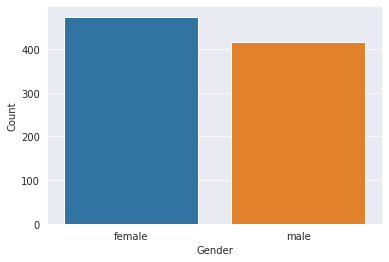

Number of males who passed: 417
Number of females who passed: 474


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [70]:
sns.countplot(x = "gender", data = df[df["Did_pass"] == True])
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

males_who_passed = get_passed("gender", "male", df)
females_who_passed = get_passed("gender", "female", df)
print("Number of males who passed: {}".format(males_who_passed))
print("Number of females who passed: {}".format(females_who_passed))

So Females are more likely to pass?

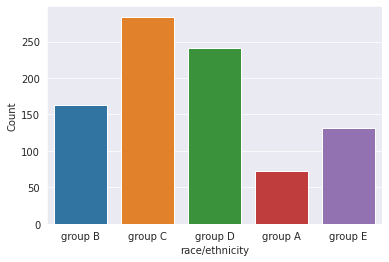

Number of people passed, group B are from race: 163
Number of people passed, group C are from race: 284
Number of people passed, group A are from race: 72
Number of people passed, group D are from race: 241
Number of people passed, group E are from race: 131


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [75]:
# lets analyze the ethnicity/ race category 

sns.countplot(x = "race/ethnicity", data = df[df["Did_pass"] == True])
plt.xlabel("race/ethnicity")
plt.ylabel("Count")
plt.show()

for race in df["race/ethnicity"].unique():
    print("Number of people passed, {} are from race: {}".format(race, get_passed("race/ethnicity", race, df)))

Looks like people from group C are more likely to pass exams

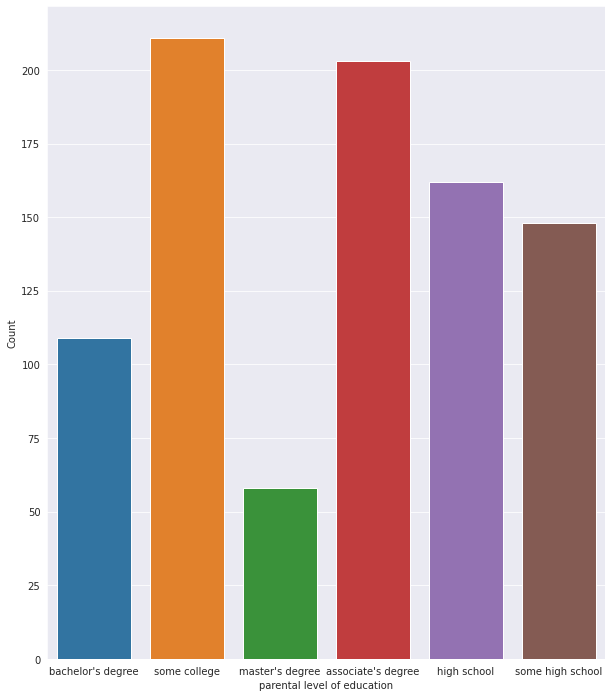

Number of people passed: 109 their parents are from: bachelor's degree
Number of people passed: 211 their parents are from: some college
Number of people passed: 58 their parents are from: master's degree
Number of people passed: 203 their parents are from: associate's degree
Number of people passed: 162 their parents are from: high school
Number of people passed: 148 their parents are from: some high school


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [82]:
plt.figure(figsize = (10,12))
sns.countplot(x = "parental level of education", data = df[df["Did_pass"] == True])

plt.xlabel("parental level of education")
plt.ylabel("Count")
plt.show()

for edu in df["parental level of education"].unique():
    print("Number of people passed: {} their parents are from: {}".format(get_passed("parental level of education", edu, df), edu))

WOW, it looks like people whose parents are have college or associates degree are more likely to pass than those with a master's degree. 

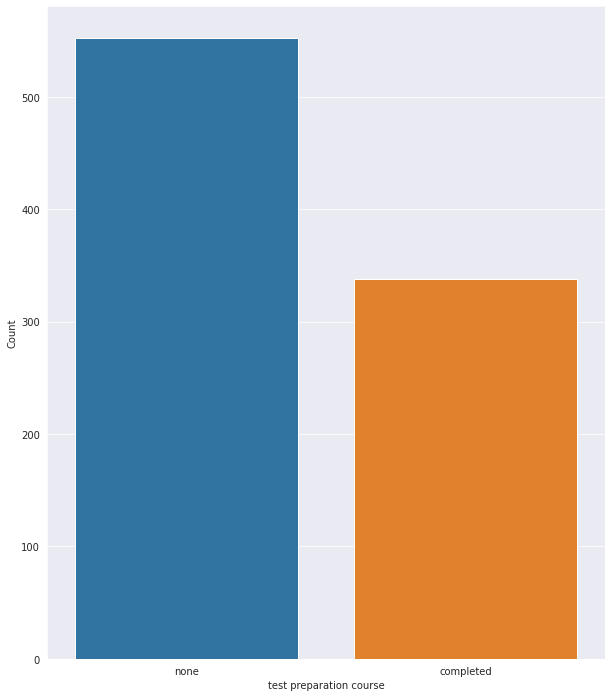

Number of people passed: 553 have done: none
Number of people passed: 338 have done: completed


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [92]:
plt.figure(figsize = (10,12))
sns.countplot(x = "test preparation course", data = df[df["Did_pass"] == True])

plt.xlabel("test preparation course")
plt.ylabel("Count")
plt.show()

for edu in df["test preparation course"].unique():
    print("Number of people passed: {} have done: {}".format(get_passed("test preparation course", edu, df), edu))

In [93]:
df["Did_pass"].value_counts()

True     891
False    109
Name: Did_pass, dtype: int64

In [95]:
# this dataset is quite skewed in the sene that there are very little people who failed, so maybe I should lower the passing score. to get a more accurate representation

This dataset is quite skewed in the sene that there are very little people who failed, so maybe I should lower the passing score. to get a more accurate representation